In [ ]:
from spot_futures_arbitrage.strategy import carry_strategy
from spot_futures_arbitrage.backtest import simple_backtest, run_backtest, summarize_portfolio

import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
futs = carry_strategy(base='BTC', quote='USDT')

signal


/Users/benjaminlee/personal/spot_futures_arbitrage/.venv/lib/python3.12/site-packages/spot_futures_arbitrage/strategy.py:100: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .last()  # or use .ohlc(), .mean(), etc.


/Users/benjaminlee/personal/spot_futures_arbitrage/.venv/lib/python3.12/site-packages/spot_futures_arbitrage/backtest.py:60: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(groupby).apply(backtest_func).reset_index(drop=True)


<Axes: xlabel='datetime', ylabel='cumulative_pnl'>

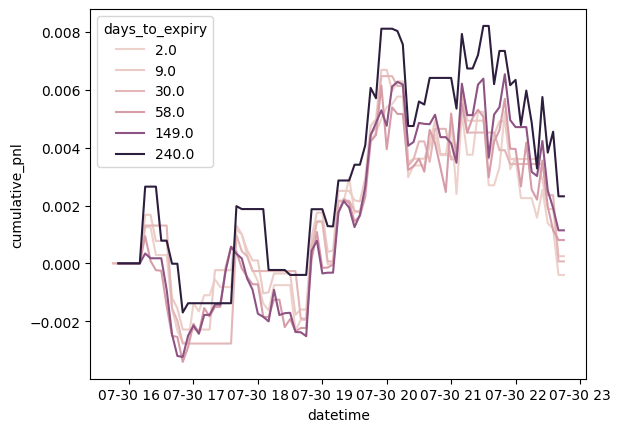

In [ ]:
df = run_backtest(futs, simple_backtest, groupby=['symbol', 'fut_pair'])

sns.lineplot(data=df, x='datetime', y='cumulative_pnl', hue='days_to_expiry')

In [24]:
summary = df.groupby('fut_pair').agg(cumulative_pnl=('cumulative_pnl', 'sum'), start_date=('datetime', 'min'), end_date=('datetime', 'max')).reset_index()

In [25]:
# volatility of pnl
df.groupby('fut_pair')['pnl'].std()

fut_pair
BTC/USDT:USDT           0.000819
BTC/USDT:USDT-250801    0.000937
BTC/USDT:USDT-250808    0.000852
BTC/USDT:USDT-250829    0.000882
BTC/USDT:USDT-250926    0.000918
BTC/USDT:USDT-251226    0.000876
BTC/USDT:USDT-260327    0.000966
Name: pnl, dtype: float64

In [26]:
summary = summarize_portfolio(df, groupby=['fut_pair'], pnl_col='pnl', cumulative_pnl_col='cumulative_pnl')

In [27]:
summary

,fut_pair,start,end,total_return,volatility,annualized_return,annualized_volatility,max_single_period_drawdown
0,BTC/USDT:USDT,2025-07-30 15:50:00,2025-07-30 22:45:00,-0.001033,0.000819,-1.753732e-10,0.015638,0.003761
1,BTC/USDT:USDT-250801,2025-07-30 15:50:00,2025-07-30 22:45:00,-0.000401,0.000937,-6.808609e-11,0.017896,0.003761
2,BTC/USDT:USDT-250808,2025-07-30 15:45:00,2025-07-30 22:45:00,0.000248,0.000852,4.158385e-11,0.016275,0.003761
3,BTC/USDT:USDT-250829,2025-07-30 15:45:00,2025-07-30 22:45:00,0.000067,0.000882,1.131029e-11,0.016852,0.003761
4,BTC/USDT:USDT-250926,2025-07-30 15:50:00,2025-07-30 22:45:00,0.000806,0.000918,1.366509e-10,0.017544,0.003761
5,BTC/USDT:USDT-251226,2025-07-30 15:50:00,2025-07-30 22:45:00,0.001142,0.000876,1.937106e-10,0.016727,0.003761
6,BTC/USDT:USDT-260327,2025-07-30 15:50:00,2025-07-30 22:45:00,0.002319,0.000966,3.929437e-10,0.018464,0.003761
